ESP32 NEURAL NETWORK TRAINING

[STEP 1/6] Generating training data...
  ✓ Training samples: 1500
  ✓ Test samples: 300
  ✓ Input shape: (1500, 32)

[STEP 2/6] Building neural network architecture...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 758 (2.96 KB)

 Trainable params: 758 (2.96 KB)

 Non-trainable params: 0 (0.00 B)


  ✓ Total parameters: 758

[STEP 3/6] Training neural network...
  This may take 1-2 minutes...

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7358 - loss: 0.5169 - val_accuracy: 1.0000 - val_loss: 0.3380
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2336 - val_accuracy: 1.0000 - val_loss: 0.1629
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1092 - val_accuracy: 1.0000 - val_loss: 0.0713
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0467 - val_accuracy: 1.0000 - val_loss: 0.0318
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 8/100
3

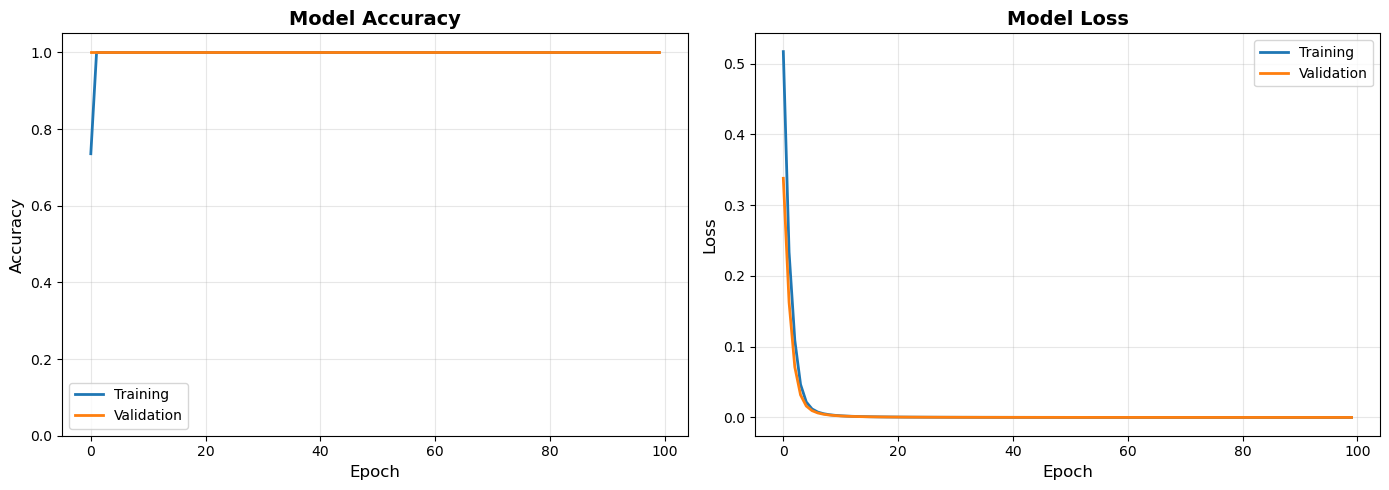

In [1]:
"""
Complete Neural Network Training for ESP32
Run this on your PC to train and export the model
"""

import numpy as np
import tensorflow as tf
from tensorflow import keras
import json
import matplotlib.pyplot as plt

print("=" * 60)
print("ESP32 NEURAL NETWORK TRAINING")
print("=" * 60)

# ============================================================================
# STEP 1: Generate Training Data
# ============================================================================
print("\n[STEP 1/6] Generating training data...")

def generate_sine_wave_data(num_samples=1000):
    """
    Generate sine wave data for classification
    - Class 0: Low frequency (1-3 Hz)
    - Class 1: High frequency (4-6 Hz)
    """
    X = []
    y = []
    
    for i in range(num_samples):
        # Randomly choose frequency and class
        if np.random.random() < 0.5:
            freq = np.random.uniform(1.0, 3.0)  # Low frequency
            label = 0
        else:
            freq = np.random.uniform(4.0, 6.0)  # High frequency
            label = 1
        
        # Generate 32 samples of sine wave
        x_vals = np.linspace(0, 2*np.pi, 32)
        signal = np.sin(freq * x_vals)
        
        # Add small amount of noise
        noise = np.random.normal(0, 0.05, 32)
        signal = signal + noise
        
        X.append(signal)
        y.append(label)
    
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.int32)

# Generate datasets
X_train, y_train = generate_sine_wave_data(1500)
X_test, y_test = generate_sine_wave_data(300)

print(f"  ✓ Training samples: {len(X_train)}")
print(f"  ✓ Test samples: {len(X_test)}")
print(f"  ✓ Input shape: {X_train.shape}")

# ============================================================================
# STEP 2: Build Neural Network
# ============================================================================
print("\n[STEP 2/6] Building neural network architecture...")

model = keras.Sequential([
    keras.layers.Input(shape=(32,), name='input'),
    keras.layers.Dense(16, activation='relu', name='hidden1'),
    keras.layers.Dense(12, activation='relu', name='hidden2'),
    keras.layers.Dense(2, activation='softmax', name='output')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()
total_params = model.count_params()
print(f"\n  ✓ Total parameters: {total_params:,}")

# ============================================================================
# STEP 3: Train the Model
# ============================================================================
print("\n[STEP 3/6] Training neural network...")
print("  This may take 1-2 minutes...\n")

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ============================================================================
# STEP 4: Evaluate Model
# ============================================================================
print("\n[STEP 4/6] Evaluating model...")

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"  ✓ Test accuracy: {test_accuracy*100:.2f}%")
print(f"  ✓ Test loss: {test_loss:.4f}")

# Test with specific examples
print("\n  Testing specific frequencies:")
for freq in [1.5, 2.5, 3.5, 4.5, 5.5]:
    x = np.linspace(0, 2*np.pi, 32)
    test_signal = np.sin(freq * x).reshape(1, -1)
    pred = model.predict(test_signal, verbose=0)
    predicted_class = np.argmax(pred[0])
    confidence = pred[0][predicted_class] * 100
    expected = 0 if freq < 3.5 else 1
    status = "✓" if predicted_class == expected else "✗"
    print(f"    {freq} Hz -> Class {predicted_class} ({confidence:.1f}%) {status}")

# ============================================================================
# STEP 5: Export Model Weights for MicroPython
# ============================================================================
print("\n[STEP 5/6] Exporting model weights...")

# Extract weights from each layer
weights_data = {}

for layer in model.layers:
    layer_weights = layer.get_weights()
    if len(layer_weights) > 0:  # Skip layers without weights
        weights_data[layer.name] = {
            'weights': layer_weights[0].tolist(),
            'bias': layer_weights[1].tolist(),
            'input_size': layer_weights[0].shape[0],
            'output_size': layer_weights[0].shape[1]
        }

# Save to JSON file
with open('model_weights.json', 'w') as f:
    json.dump(weights_data, f, indent=2)

print(f"  ✓ Weights saved to 'model_weights.json'")

# Calculate file size
import os
file_size = os.path.getsize('model_weights.json')
print(f"  ✓ File size: {file_size:,} bytes ({file_size/1024:.1f} KB)")

# ============================================================================
# STEP 6: Create MicroPython Config File
# ============================================================================
print("\n[STEP 6/6] Creating configuration file...")

config = {
    'input_size': 32,
    'hidden1_size': 16,
    'hidden2_size': 12,
    'output_size': 2,
    'architecture': '32 -> 16 -> 12 -> 2',
    'trained_date': str(np.datetime64('today')),
    'test_accuracy': float(test_accuracy),
    'classes': {
        0: 'Low Frequency (1-3 Hz)',
        1: 'High Frequency (4-6 Hz)'
    }
}

with open('model_config.json', 'w') as f:
    json.dump(config, f, indent=2)

print(f"  ✓ Config saved to 'model_config.json'")

# ============================================================================
# STEP 7: Plot Training History
# ============================================================================
print("\n[STEP 7/6] Generating training plots...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 1.05])

# Plot loss
axes[1].plot(history.history['loss'], label='Training', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
print(f"  ✓ Plot saved to 'training_history.png'")

# ============================================================================
# COMPLETION SUMMARY
# ============================================================================
print("\n" + "=" * 60)
print("TRAINING COMPLETE!")
print("=" * 60)
print("\nFiles generated:")
print("  1. model_weights.json    - Neural network weights")
print("  2. model_config.json     - Model configuration")
print("  3. training_history.png  - Training plots")
print("\nNext steps:")
print("  1. Open Thonny IDE")
print("  2. Connect to your ESP32")
print("  3. Upload model_weights.json to ESP32")
print("  4. Upload the MicroPython inference scripts")
print("  5. Run main.py on ESP32")
print("\n" + "=" * 60)